# Интеллектуальный анализ данных – весна 2022

# Домашнее задание 7: Деревья. Случайный лес

Правила:

- Домашнее задание оценивается в 10 баллов (+1 бонусный балл).


- Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


- Можно использовать любые свободные источники с обязательным указанием ссылки на них.


- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

<!-- ![](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1) -->
<img src="https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1" alt="Drawing" style="width: 700px;"/>

## Часть 1: Основы построения решающие дерева (1.5 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Задание 1.1 (0.5 балла)** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————

probability = np.array([8, 2]) / 10
log_p = np.log(probability)

entropy = -np.dot(probability, log_p)

print("Entropy = %.2f" % entropy)

Entropy = 0.50


**Задание 1.2 (0.5 балла)** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_{k=1}^J p_k(1-p_k),
$$
где $J$ – общее количество классов (в нашем случае, $J = 2$).

Ответ округлите до двух знаков после запятой.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————

def gini(probability: np.ndarray) -> float:
    return np.dot(probability, 1 - probability)

print("Q(R_m, j, t) = %.2f" % (gini(probability) - 0.8 * gini(np.array([1])) - 0.2 * gini(np.array([1]))))

Q(R_m, j, t) = 0.32


**Задание 1.3 (0.5 балла)** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————

pred = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
print(sum(pred) / len(pred))

40.6


## Часть 2: Решающие деревья (4.5 балла)

В этой части мы напишем и протестируем собственную реализацию решающего дерева.

In [ ]:
from collections import Counter
from typing import Dict, List, Tuple, Union

**Задание 2.1 (1.5 балла)** Реализуйте функцию `find_best_split()`, которая должна находить оптимальное разбиение подмножества обучающей выборки в соответствии с информационным критерием из **Задания 1.2**. В качестве меры хаотичности $H(R)$ для задачи регрессии испольуйте дисперсию подвыборки, а для задачи классификации – критерий Джини (определён в том же задании).

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям.

**Бонус:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла – **бонус 1 балл**.

In [ ]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame],
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
    if isinstance(feature_vector, pd.DataFrame):
        feature_vector = feature_vector.to_numpy().flatten()
    if isinstance(target_vector, pd.Series):
        target_vector = target_vector.to_numpy()

    H_R: function = None
    R: np.ndarray = None
    if task == "classification":
        H_R = gini_from_probability_vector
    else:
        H_R = np.var
    R = target_vector

    sort_features = np.array(np.sort(np.unique(feature_vector)))
    if len(sort_features) == 1:
        return sort_features, np.array([0]), sort_features[0], 0

    thresholds = []
    ginis = []
    if feature_type == "real":
        thresholds_ = (sort_features[:-1] + sort_features[1:]) / 2
        for t in thresholds_:
            left, right = feature_vector < t, feature_vector >= t
            len_l, len_r = left.sum(), right.sum()
            len_m = feature_vector.size
            if len_l == 0 or len_r == 0:
                continue

            thresholds.append(t)
            Q = H_R(R) - len_l / len_m * H_R(R[left]) - len_r / len_m * H_R(R[right])
            ginis.append(Q)

        best_index = np.argmax(ginis)
        return np.array(thresholds), np.array(ginis), thresholds[best_index], ginis[best_index]

    else:
        for t in np.unique(feature_vector):
            left = feature_vector == t
            right = ~left
            len_l, len_r = left.sum(), right.sum()
            len_m = feature_vector.size
            if len_l == 0 or len_r == 0:
                continue

            thresholds.append(t)
            Q = H_R(R) - len_l / len_m * H_R(R[left]) - len_r / len_m * H_R(R[right])
            ginis.append(Q)

        best_index = np.argmax(ginis)
        return np.array(thresholds), np.array(ginis), thresholds[best_index], ginis[best_index]


# function for transforming object vector to probabilities
def gini_from_probability_vector(classes: np.ndarray) -> np.ndarray:
    unique_classes, cnt_classes = np.unique(classes, return_counts=True)
    return gini(cnt_classes / classes.size)

Эту функцию можно протестировать на датасете `California`.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
X = pd.DataFrame(data=data["data"], columns=data["feature_names"])
y = data["target"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `MedInc`.

Пример работы алгоритма для регрессии с вещественными признаками

In [ ]:
def H(p1):
    return 1 - p1 ** 2 - (1 - p1) ** 2


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    sort_idx = np.argsort(feature_vector)
    sort_features = feature_vector[sort_idx]
    sort_target = target_vector[sort_idx]

    features_for_thresholds = np.unique(sort_features)
    if len(features_for_thresholds) == 1:
        return sort_features, np.array([0]), sort_features[0], 0
    thresholds_ = (features_for_thresholds + np.roll(features_for_thresholds, -1))[:-1] / 2

    # # массив масок для каждого threshold
    # left_mask = sort_features[np.newaxis, :] < thresholds_[:, np.newaxis]
    # right_mask = ~left_mask
    # non_zero_split = (left_mask.sum(axis=1) != 0) & (right_mask.sum(axis=1) != 0)
    # thresholds_ = thresholds_[non_zero_split]

    left_mask = sort_features[np.newaxis, :] < thresholds_[:, np.newaxis]
    right_mask = ~left_mask
    left_proportion = np.mean(left_mask, axis=1)
    right_proportion = 1 - left_proportion

    prefix_sum = np.cumsum(sort_target)
    req_idx_left = left_mask.sum(axis=1) - 1
    p1_left = prefix_sum[req_idx_left] / (req_idx_left + 1)

    req_idx_right = right_mask.sum(axis=1) - 1
    p1_right = (prefix_sum[-1] - prefix_sum[req_idx_left]) / (req_idx_right + 1)

    ginis = -left_proportion * H(p1_left) - right_proportion * H(p1_right)
    best_index = np.argmax(ginis)

    return thresholds_, ginis, thresholds_[best_index], ginis[best_index]

In [ ]:
np.unique(X, return_counts=True)

(array([0, 1, 2, 3]), array([2, 2, 1, 6]))

In [ ]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    sort_idx = np.argsort(feature_vector)
    sort_features = feature_vector[sort_idx]
    sort_target = target_vector[sort_idx]

    features_for_thresholds = np.unique(sort_features)
    if features_for_thresholds.shape[0] == 1:
        return sort_features, np.array([0]), sort_features[0], 0
    thresholds_ = (features_for_thresholds + np.roll(features_for_thresholds, -1))[:-1] / 2


    # # массив масок для каждого threshold
    # left_mask = sort_features[np.newaxis, :] < thresholds_[:, np.newaxis]
    # right_mask = ~left_mask
    # non_zero_split = (left_mask.sum(axis=1) != 0) & (right_mask.sum(axis=1) != 0)
    # thresholds_ = thresholds_[non_zero_split]

    left_mask = sort_features[np.newaxis, :] < thresholds_[:, np.newaxis]
    right_mask = ~left_mask
    left_sum = left_mask.sum(axis=1)
    left_shape = left_mask.shape
    target_size = np.full((left_shape[0]), left_shape[1])

    # left_proportion = np.mean(left_mask, axis=1)
    left_proportion = left_sum / target_size
    right_proportion = 1 - left_proportion

    prefix_sum = np.cumsum(sort_target)
    req_idx_left = left_sum - 1
    # req_idx_left = left_mask.sum(axis=1) - 1
    p1_left = prefix_sum[req_idx_left] / left_sum

    # req_idx_right = right_mask.sum(axis=1) - 1
    p1_right = (prefix_sum[-1] - prefix_sum[req_idx_left]) / (target_size - left_sum)

    ginis = -left_proportion * (1 - p1_left ** 2 - (1 - p1_left) ** 2) - \
            right_proportion * (1 - p1_right ** 2 - (1 - p1_right) ** 2)
    # ginis = -left_proportion * H(p1_left) - right_proportion * H(p1_right)
    best_index = np.argmax(ginis)

    return thresholds_, ginis, thresholds_[best_index], ginis[best_index]

In [ ]:
find_best_split(X, y)

[2 4 5] [11 11 11]


(array([0.5, 1.5, 2.5]),
 array([-0.37373737, -0.13636364, -0.21818182]),
 1.5,
 -0.13636363636363635)

In [ ]:
np.unique([1, 1, 1, 2], return_counts=True)[1]

array([3, 1])

In [ ]:
def H(p1):
    return 1 - p1 ** 2 - (1 - p1) ** 2


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    sort_idx = np.argsort(feature_vector)
    sort_features = feature_vector[sort_idx]
    sort_target = target_vector[sort_idx]

    thresholds_ = (sort_features + np.roll(sort_features, -1))[:-1] / 2

    cnt_objects = sort_features.shape[0]
    left_proportion = np.arange(1, cnt_objects + 1) / cnt_objects
    right_proportion = 1 - left_proportion

    prefix_sum = np.cumsum(sort_target)
    pos_idx_left = np.cumsum(np.unique(sort_features, return_counts=True)[1][:-1]) - 1
    p1_left = prefix_sum[pos_idx_left] / (pos_idx_left + 1)
    right_objects_cnt = cnt_objects - pos_idx_left + 1
    p1_right = (prefix_sum[-1] - prefix_sum[pos_idx_left]) / right_objects_cnt

    ginis = -left_proportion[pos_idx_left] * H(p1_left) - right_proportion[pos_idx_left] * H(p1_right)
    # константный вектор признаков
    if ginis.shape[0] == 0:
        return sort_features, np.array([0]), sort_features[0], 0

    best_index = np.argmax(ginis)
    thresholds_ = thresholds_[pos_idx_left]

    return thresholds_, ginis, thresholds_[best_index], ginis[best_index]

In [ ]:
X = np.array([3, 3, 3, 3, 3, 3])
y = np.array([0, 0, 0, 0, 0, 0])

thresholds_, values_, threshold_best_, gini_best_ = find_best_split(X, y)

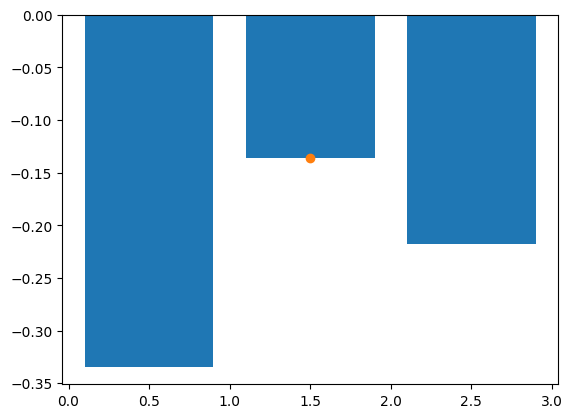

In [ ]:
X = np.array([0, 1, 0, 2, 1, 3, 3, 3, 3, 3, 3])
y = np.array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

thresholds_, values_, threshold_best_, gini_best_ = find_best_split(X, y)

plt.bar(thresholds_, values_)
plt.scatter(threshold_best_, gini_best_)

In [ ]:
thresholds_, values_, threshold_best_, gini_best_

(array([0.5, 1.5, 2.5]),
 array([-0.37373737, -0.13636364, -0.21818182]),
 1.5,
 -0.13636363636363635)

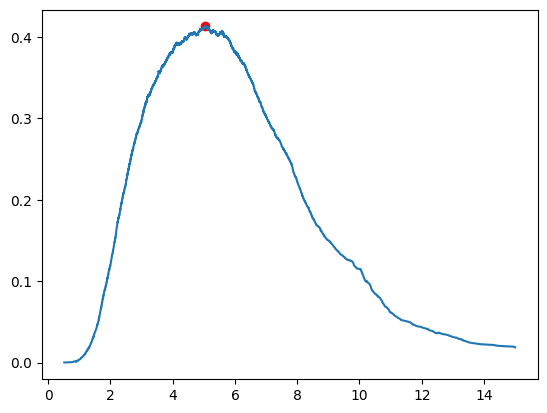

In [ ]:
thresholds, ginis, threshold_best, gini_best = find_best_split(X['MedInc'], y, 'regression')
plt.plot(thresholds, ginis)
plt.scatter(threshold_best, gini_best, color='r')

Пример работы алгоритма для классификации с вещественными признаками

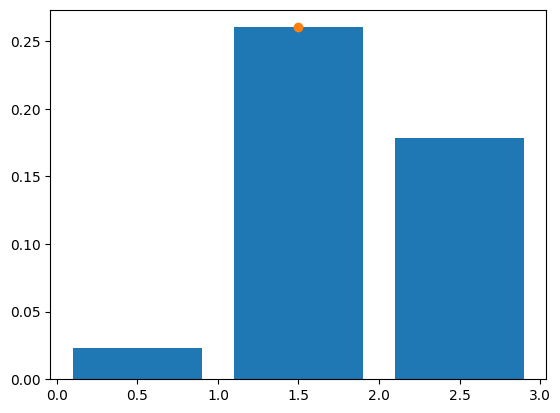

In [ ]:
X = np.array([0, 1, 0, 2, 1, 3, 3, 3, 3, 3, 3])
y = np.array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

thresholds_, values_, threshold_best_, gini_best_ = find_best_split(X, y)

plt.bar(thresholds_, values_)
plt.scatter(threshold_best_, gini_best_)

Пример работы алгоритма для регрессии с категориальными признаками

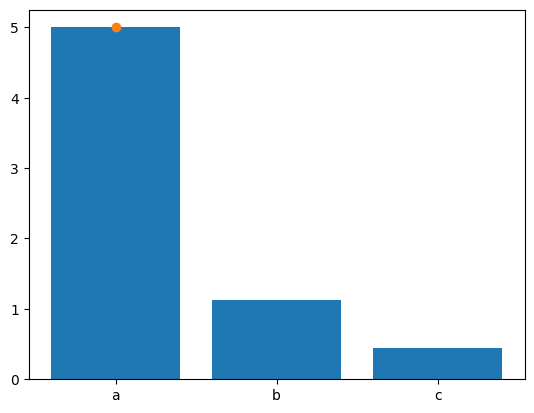

In [ ]:
df = pd.DataFrame(['a', 'b', 'c', 'c', 'b', 'c'])
y_now = np.array([10, 2, 3, 4, 5, 6])

thresholds_, values_, best_threshold, best_value = find_best_split(df, y_now, "regression", "categorical")

plt.bar(thresholds_, values_)
plt.scatter(best_threshold, best_value)

Пример работы алгоритма для классификации с категориальными признаками

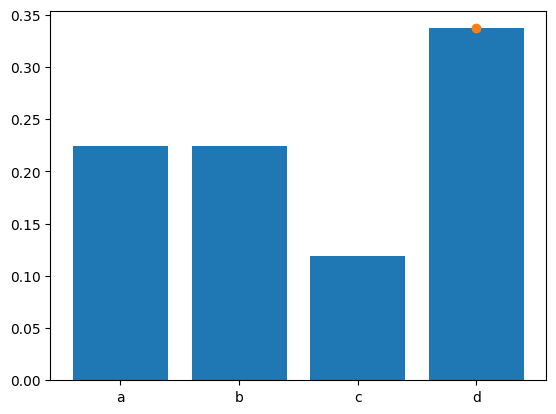

In [ ]:
df = pd.DataFrame(["a", "b", "a", "c", "b", "d", "d", "d", "d", "d", "d"])
y = np.array([0, 1, 0, 2, 1, 3, 3, 3, 3, 3, 3])

thresholds_, values_, best_threshold, best_value = find_best_split(df, y, "classification", "categorical")

plt.bar(thresholds_, values_)
plt.scatter(best_threshold, best_value)

Найдите лучший, с вашей точки зрения, предикат первой вершины решающего дерева.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————

print(f"Лучший предикат первой вершины решающего дерева по MedInc: x < {threshold_best}")

Лучший предикат первой вершины решающего дерева по MedInc: x < 5.03515


**Задание 2.2 (1 балл)** Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод `_predict_node()`.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- **Выбор лучшего разбиения** необходимо производить по критерию Джини.
- **Критерий останова:** все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку.
- **Ответ в листе:** наиболее часто встречающийся класс в листе.

В задаче также предлагается получить два бонуса, по баллу на каждый!

- **Реализуйте способ обрабатывать пропуски в даннх и реализуйте его, пояснив свои действия.**
- **Реализуйте метод оценки важности признаков.**

2 ячейки ниже иллюстрируют схему заполнения пропусков в массиве признаков для бонусного задания:

Вещественные признаки

In [ ]:
a = np.array([0, 1, None, 3, None])
mask = a != None
a[~mask] = np.mean(a[mask])
a

array([0, 1, 1.3333333333333333, 3, 1.3333333333333333], dtype=object)

Категориальные признаки

In [ ]:
b = np.array(["a", "b", None, "a", None])
mask = b != None
b[~mask] = Counter(b[mask]).most_common(1)[0][0]
b

array(['a', 'b', 'a', 'a', 'a'], dtype=object)

In [ ]:
class DecisionTree:

    def __init__(
        self,
        feature_types: Union[List[str], np.ndarray],
        max_depth: int = None,
        min_samples_split: int = None,
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:

        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}

        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types

        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

        # Переменная, если вы решите делать бонус
        self._feature_importances = {}


    def _fit_node(
        self,
        sub_X: np.ndarray,
        sub_y: np.ndarray,
        node: dict
    ) -> None:

        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X[:, feature]

                # заполним пропуски в вещественных данных
                # берем маску с НЕпропущенными значениями по массиву признаков
                # заполняем пропуски средним значением по признаку
                mask = feature_vector != None
                feature_vector[~mask] = np.mean(feature_vector[mask])
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X[:, feature]

                # заполним пропуски в категориальных данных
                # берем маску с НЕпропущенными значениями по массиву признаков
                # заполняем пропуски наиболее популярным значением среди всего признака
                mask = feature_vector != None
                feature_vector[~mask] = Counter(feature_vector[mask]).most_common(1)[0][0]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    threshold_best = threshold
                    # split = # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
                    split = feature_vector < threshold_best
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    # split = # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
                    split = feature_vector == threshold_best
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————
        if node["type"] == "terminal":
            return node["class"]

        x_j = x[node["feature_split"]]
        t = node["threshold"]

        return self._predict_node(x, node["left_child"]) if x_j < t else self._predict_node(x, node["right_child"])

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))

        return np.array(predicted)

**Задание 2.3 (1 балл)** Загрузите таблицу `students.csv` (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте диаграммы рассеяния "значение признака — класс" для всех пяти признаков.

In [ ]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw07-trees/students.csv

--2023-06-03 20:07:05--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw07-trees/students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7794 (7.6K) [text/plain]
Saving to: ‘students.csv’

students.csv        100%[===================>]   7.61K  --.-KB/s    in 0s      

2023-06-03 20:07:05 (101 MB/s) - ‘students.csv’ saved [7794/7794]



In [ ]:
X = pd.read_csv("/content/students.csv")
columns = X.columns
y = X[columns[-1]].to_numpy()
X.drop([columns[0], columns[-1]], inplace=True, axis=1)

X.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [ ]:
y

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
plot_data = []

columns = X.columns
for col in columns:
    feature_vector = X[col].to_numpy()
    sort_features = np.array(np.sort(np.unique(feature_vector)))

    H_R = gini_from_probability_vector

    ginis = []
    thresholds = (sort_features[:-1] + sort_features[1:]) / 2
    for t in thresholds:
        left, right = feature_vector < t, feature_vector >= t
        len_l, len_r = left.sum(), right.sum()
        len_m = feature_vector.size

        Q = H_R(y) - len_l / len_m * H_R(y[left]) - len_r / len_m * H_R(y[right])
        ginis.append(Q)
    plot_data.append((thresholds, ginis))

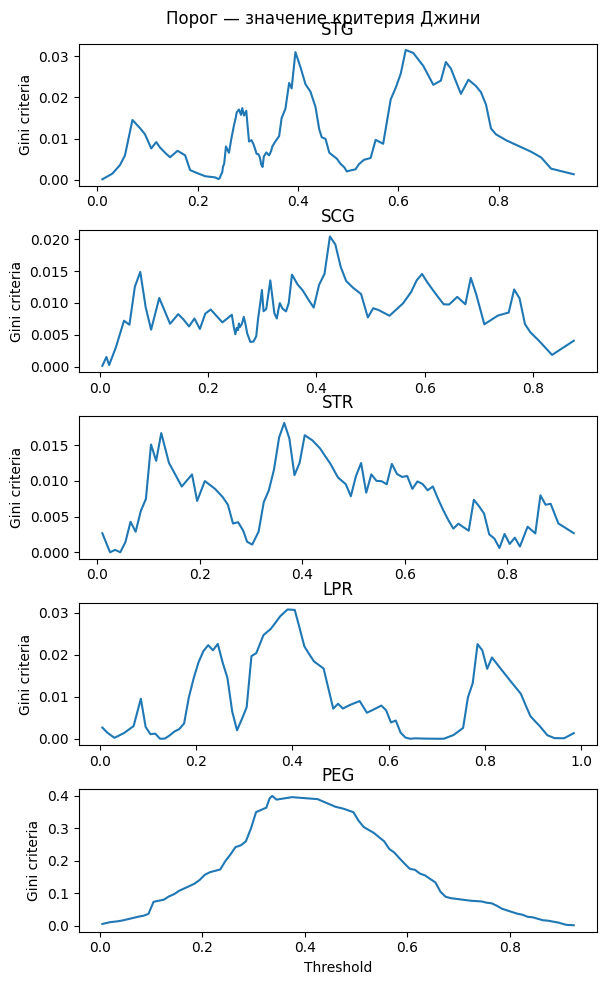

In [ ]:
fig, axs = plt.subplots(nrows=5, figsize=(6, 10))
fig.suptitle("Порог — значение критерия Джини")
plt.xlabel("Threshold")
fig.tight_layout()

for i in range(5):
    axs[i].plot(plot_data[i][0], plot_data[i][1])

    axs[i].set_ylabel("Gini criteria")
    axs[i].set_title(columns[i])

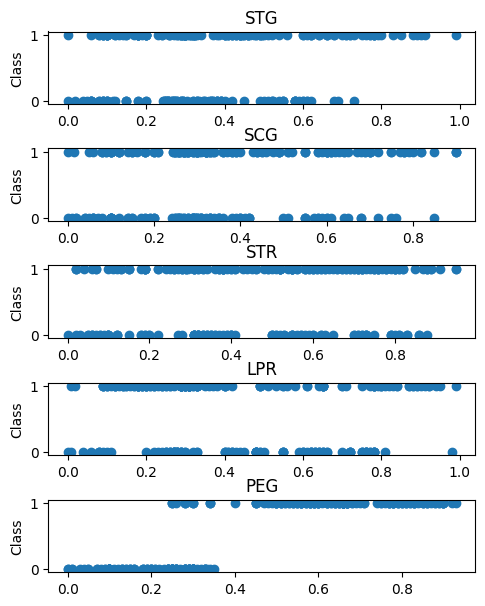

In [ ]:
fig, axs = plt.subplots(nrows=5, figsize=(5, 6))
fig.tight_layout()

for i in range(5):
    axs[i].scatter(X[columns[i]], y)

    axs[i].set_title(columns[i])
    axs[i].set_ylabel("Class")

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой диаграмм рассеяиния? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Исходя из значений кривых критерия Джини, необходимо производить деление выборки на два поддерева по **критерию PEG**, так как на графике прослеживается четкое наличие порога (≈3.5) для максимизации критерия Джини (информативности).

Данный результат согласуется с визуальной оценкой диаграмм рассеяиния. Критерий PEG имеет наиболее четкое распределение значений по двум классам среди остальных критериев.

Кривая для "хороших" бинарных признаков представляет собой выпуклую функцию с единственным максимумом, что позволяет однозначно разделить выборку по порогу. В общем случае на графике должен быть виден ярко выраженный максимум по оси ординат.

Кривые для признаков, по которым деление практически невозможно, характеризуются наличием множетсва максимумов функции, колеблющихся в одном малом диапазоне

**Задание 2.4 (1 балл)** Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom).

1. Скачайте таблицу `agaricus-lepiota.data` (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)),
2. Считайте таблицу при помощи `pandas`,
3. Примените к каждому столбцу `LabelEncoder` (из `sklearn`), чтобы преобразовать строковые имена категорий в натуральные числа.

Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

--2023-06-03 20:08:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data’

agaricus-lepiota.da 100%[===================>] 364.95K  --.-KB/s    in 0.04s   

2023-06-03 20:08:18 (9.05 MB/s) - ‘agaricus-lepiota.data’ saved [373704/373704]



In [ ]:
 df = pd.read_csv("/content/agaricus-lepiota.data")
 columns = df.columns
 X = df[columns[1:]]
 y = df[columns[0]]

 display(X.head(), y.head())

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


0    e
1    e
2    p
3    e
4    e
Name: p, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=7)

In [ ]:
X_le = LabelEncoder()
feature_types = ["real"] * X_train.size
for feature in X_train:
    X_train[feature] = X_le.fit_transform(X_train[feature])
    X_test[feature]  = X_le.transform(X_test[feature])

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
y_le = LabelEncoder()

y_train = y_le.fit_transform(y_train)
y_test  = y_le.transform(y_test)

In [ ]:
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

In [ ]:
predictions = tree.predict(X_test)
print("Accuracy for test split = %.2f" % accuracy_score(predictions, y_test))

Accuracy for test split = 1.00


## Часть 3: Бэггинг и случайный лес (4 балла)

В данной части мы будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

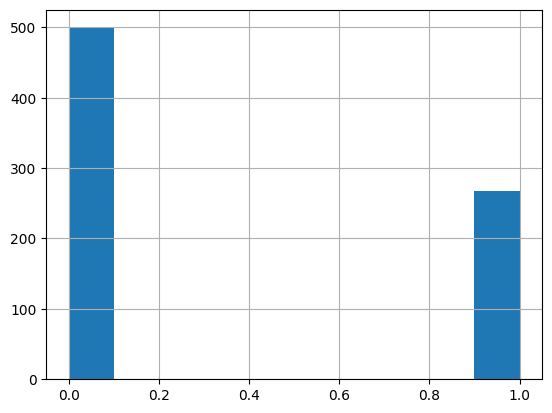

In [ ]:
data['Outcome'].hist()
plt.show()

**Задание 3.1 (0.5 балла)** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [ ]:
columns = data.columns
X = data[columns[:-1]]
y = data[columns[-1]]

X_train_, X_test, y_train_, y_test = train_test_split(X, y, train_size=0.7, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, train_size=0.7, random_state=7)

In [ ]:
print(f"Data size = {data.shape[0]}")
print(f"X_train size = {X_train.shape[0]} or {(X_train.shape[0] / data.shape[0]):.2f}")
print(f"X_val size = {X_val.shape[0]} or {(X_val.shape[0] / data.shape[0]):.2f}")
print(f"X_test size = {X_test.shape[0]} or {(X_test.shape[0] / data.shape[0]):.2f}")

Data size = 768
X_train size = 375 or 0.49
X_val size = 162 or 0.21
X_test size = 231 or 0.30


**Задание 3.2 (1 балл)** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке.


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [ ]:
max_depth = [1, 3, 5, 10, 15, 20, None]
min_samples_leaf = [1, 3, 5, 9, 15, 25]

variants = []
metrics_data = []
for depth in max_depth:
    for leaf_cnt in min_samples_leaf:
        variants.append([depth, leaf_cnt])

        dt = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_leaf=leaf_cnt,
            random_state=7
        )
        dt.fit(X_train, y_train)

        f1 = f1_score(y_val, dt.predict(X_val))
        metrics_data.append(f1)

best_index = np.argmax(metrics_data)
print(f"Best f1_score = {metrics_data[best_index]} with" f"\nbest [max_depth, min_samples_leaf] = {variants[best_index]}")

Best f1_score = 0.628099173553719 with
best [max_depth, min_samples_leaf] = [5, 15]


In [ ]:
X_all_train, y_all_train = pd.concat([X_train, X_val]), pd.concat([y_train, y_val])
f"{X_all_train.shape[0]} = {X_train.shape[0] + X_val.shape[0]}"

'537 = 537'

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=7)
dt.fit(X_all_train, y_all_train)

names = ["accuracy_score", "precision_score", "recall_score", "roc_auc_score"]
metrics_ = [accuracy_score, precision_score, recall_score, roc_auc_score]
for name, metric in zip(names, metrics_):
    print(f"{name} on test = {(metric(y_test, dt.predict(X_test))):.2f}")


accuracy_score on test = 0.72
precision_score on test = 0.61
recall_score on test = 0.68
roc_auc_score on test = 0.71


**Задание 3.3 (0.5 балла)** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [ ]:
from sklearn.ensemble import BaggingClassifier


base_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=7)

bag = BaggingClassifier(base_tree, n_estimators=50)
bag.fit(X_all_train, y_all_train)

for name, metric in zip(names, metrics_):
    print(f"{name} on test = {(metric(y_test, bag.predict(X_test))):.2f}")

accuracy_score on test = 0.77
precision_score on test = 0.69
recall_score on test = 0.67
roc_auc_score on test = 0.75


**Задание 3.4 (1 балл)** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации.
3. Выберите ту пару значений, которая даёт наилучшее среднее качество.

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


splits_cnt = 7
kf = KFold(n_splits=splits_cnt)

max_depth = [1, 3, 5, 10, 15, 20, 50]
min_samples_leaf = [2, 3, 5, 9, 15, 25, 50]

variants = []
f1_data = []
for depth in max_depth:
    for leaf_cnt in min_samples_leaf:
        variants.append([depth, leaf_cnt])
        f1 = .0

        for train_index, test_index in kf.split(X_all_train):
            X_cur_train, X_cur_val = X_all_train.iloc[train_index], X_all_train.iloc[test_index]
            y_cur_train, y_cur_val = y_all_train.iloc[train_index], y_all_train.iloc[test_index]

            model = RandomForestClassifier(
                max_depth=depth,
                min_samples_split=leaf_cnt,
                n_estimators=50
            )
            model.fit(X_cur_train, y_cur_train)
            f1 += f1_score(y_cur_val, model.predict(X_cur_val))

        f1 /= splits_cnt
        f1_data.append(f1)

best_index = np.argmax(f1_data)
print(f"Best f1_score = {f1_data[best_index]} with" f"\nbest [max_depth, min_samples_leaf] = {variants[best_index]}")

Best f1_score = 0.6380034710223389 with
best [max_depth, min_samples_leaf] = [50, 15]


In [ ]:
model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=15,
    n_estimators=50
)
model.fit(X_all_train, y_all_train)

for name, metric in zip(names, metrics_):
    print(f"{name} on test = {(metric(y_test, model.predict(X_test))):.2f}")

accuracy_score on test = 0.77
precision_score on test = 0.70
recall_score on test = 0.63
roc_auc_score on test = 0.74


Мне кажется, лучшей моделью оказался **Bagging классификатор**, который имеет самую высокую степень покрытия данных в сочетании с лучшими метриками accuray, roc_auc. Данная модель слегка уступает по показателю precision RandomForest'у, но данное отставание компенсируется доминированием остальных метрик

**Задание 3.5 (0.5 балла)** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

In [ ]:
n_estimators = [x for x in range(1, 1000, 25)]
roc_auc_list = []

for n_estim in n_estimators:
    model = RandomForestClassifier(
        max_depth=20,
        min_samples_split=15,
        n_estimators=n_estim
    )
    model.fit(X_all_train, y_all_train)

    roc_auc_list.append(roc_auc_score(y_test, model.predict(X_test)))

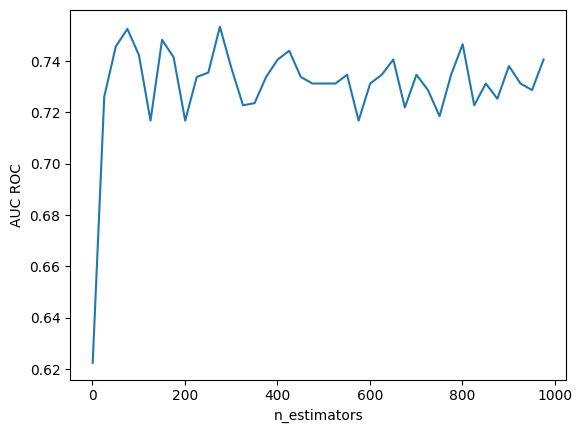

In [ ]:
fig.suptitle("n_estimators — AUC ROC")
plt.xlabel("n_estimators")
plt.ylabel("AUC ROC")
fig.tight_layout()

plt.plot(n_estimators, roc_auc_list)

По графику заметно, что случайный лес не переобучается при увеличении числа деревьев (что и обсуждалось на лекциях)

**Задание 3.6 (0.5 балла)** Для лучшей модели случайного леса из **Задания 3.4** посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

In [ ]:
best_model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=15,
    n_estimators=50
)
best_model.fit(X_all_train, y_all_train)

RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=50)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

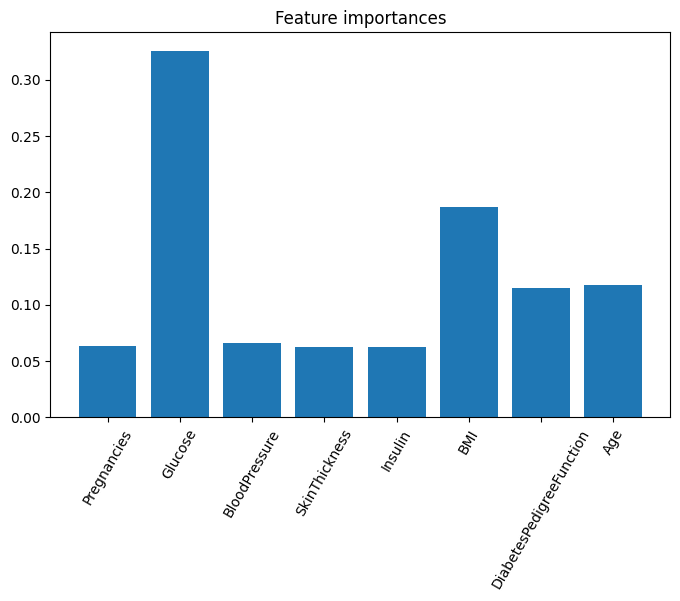

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Feature importances")
plt.bar(best_model.feature_names_in_, best_model.feature_importances_)
plt.xticks(rotation=60)

Шок... Похоже сахар/глюкоза причина диабета! (но только второго типа)

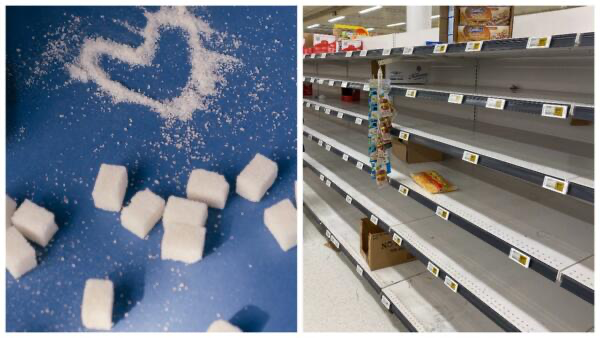